In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
from turfpy.measurement import boolean_point_in_polygon
from geojson import Point, Polygon, Feature


def get_filepath(state):
    return '../data/{state}/'.format(state=state)
def get_filepath_city(city):
    return '../data/' + city + '-bike/'



x_pop= []
x_white = []
x_income=  []
y= []
CITY = 'dc'
STATE = 'dc'
year = 2019

with open(get_filepath(STATE) + f'{STATE}_census_tracts.geojson') as census_file:
    with open(get_filepath_city(CITY) + 'stations.json') as bike_file:
        bike_data = json.load(bike_file)
        census_data = json.load(census_file)
        
        for tract in census_data['features']:
            geometry = tract['geometry']['coordinates'][0]
            num_bike = 0
            
            polygon = Polygon(geometry)
            for station in bike_data:
                if int(station['first'][:4]) > year:
                    continue
                point = Feature(geometry=Point([station['lon'], station['lat']]))
                if boolean_point_in_polygon(point, polygon):
                    num_bike+=1
            if num_bike == 0:
                continue
            
            
            income = tract['properties'][f'{year} median income']
            try:
                x_income.append(int(income))
            except:
                continue
            x_pop.append(int(tract['properties'][f'{year} race: total households']))
            x_white.append(int(tract['properties'][f'{year} race: White'])/int(tract['properties'][f'{year} race: total households']))
            y.append(num_bike)
        





Text(0, 0.5, 'Number of Households')

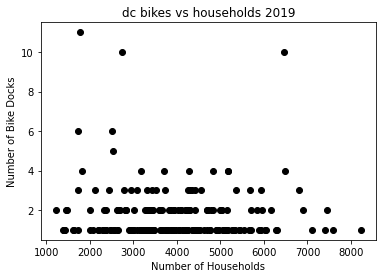

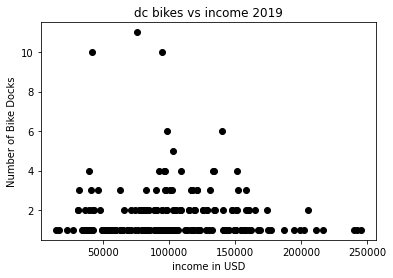

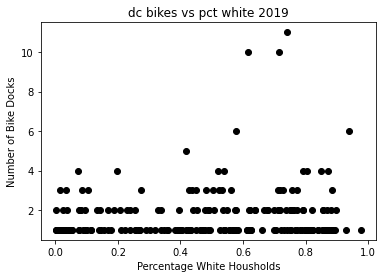

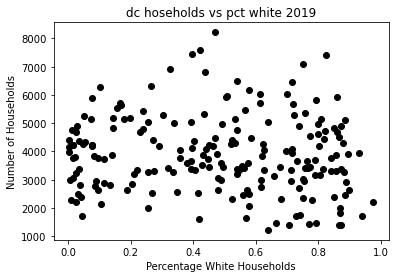

In [8]:

fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)

ax1.scatter(x_pop, y, marker = 'o', color = 'black')
ax2.scatter(x_income, y, marker = 'o', color = 'black')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(x_white, y, marker = 'o', color = 'black')

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(x_white, x_pop, marker = 'o', color = 'black')

ax1.set_title(f'{CITY} bikes vs households {year}')
ax1.set_xlabel('Number of Households')
ax1.set_ylabel('Number of Bike Docks')

ax2.set_title(f'{CITY} bikes vs income {year}')
ax2.set_xlabel('income in USD')
ax2.set_ylabel('Number of Bike Docks')

ax3.set_title(f'{CITY} bikes vs pct white {year}')
ax3.set_xlabel('Percentage White Housholds')
ax3.set_ylabel('Number of Bike Docks')

ax4.set_title(f'{CITY} hoseholds vs pct white {year}')
ax4.set_xlabel('Percentage White Households')
ax4.set_ylabel('Number of Households')
